In [11]:
# Импорт необходимых библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, accuracy_score

In [13]:
# Загрузка первых 400 строк датасета
df = pd.read_csv('C:/users/senpai_sqrt2/Desktop/Uni/3rd course/ML/ML_course/ML4.4 diagnostics/data/diabetes.csv', nrows=400)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [15]:
# Количественное описание датасета
print("Число признаков:", df.shape[1] - 1)  # минус целевая переменная
print("\nСтатистика по признакам:")
df.describe()

Число признаков: 8

Статистика по признакам:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,400.000000,400.00000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000
mean,3.952500,121.24000,69.060000,20.327500,81.250000,32.10775,0.487915,33.092500,0.380000
std,3.369514,32.68437,19.011575,15.599796,121.597254,8.13714,0.349619,11.325396,0.485994
min,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.078000,21.000000,0.000000
25%,1.000000,100.00000,64.000000,0.000000,0.000000,27.30000,0.250500,24.000000,0.000000
50%,3.000000,116.50000,71.000000,23.000000,36.000000,32.00000,0.381000,29.000000,0.000000
75%,6.000000,143.00000,80.000000,32.000000,128.250000,36.60000,0.652500,40.000000,1.000000
max,17.000000,197.00000,122.000000,60.000000,846.000000,67.10000,2.329000,69.000000,1.000000


In [17]:
# Отделение целевой переменной
target = "Outcome"
y = df[target]
X = df.drop(target, axis=1)

In [19]:
# Разделение данных на обучающую и валидационную выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Создание и обучение модели DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=1).fit(X_train, y_train)

# Предсказание и оценка модели
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("Train f1-score = %.4f" % f1_score(y_train, y_train_pred))
print("Test f1-score = %.4f" % f1_score(y_test, y_test_pred))

Train f1-score = 1.0000
Test f1-score = 0.6364


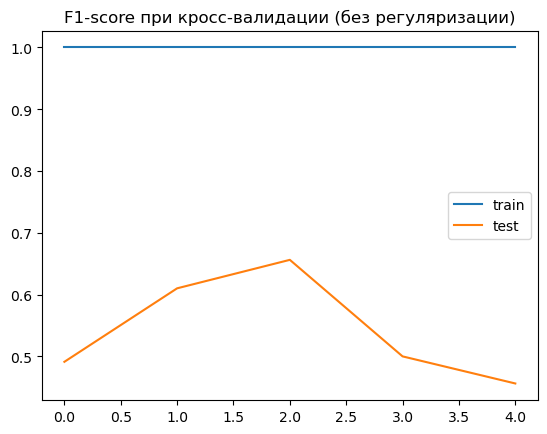

In [23]:
# Кросс-валидация и построение графика
cv_results = cross_validate(model, X, y, cv=5, scoring='f1', return_train_score=True)

plt.plot(cv_results['train_score'], label='train')
plt.plot(cv_results['test_score'], label='test')
plt.legend()
plt.title('F1-score при кросс-валидации (без регуляризации)')
plt.show()

In [25]:
# Регуляризация модели (уменьшение глубины дерева)
model_reg = DecisionTreeClassifier(random_state=1, max_depth=3).fit(X_train, y_train)

# Предсказание и оценка регуляризованной модели
y_train_pred_reg = model_reg.predict(X_train)
y_test_pred_reg = model_reg.predict(X_test)

print("Train f1-score (регуляризованная) = %.4f" % f1_score(y_train, y_train_pred_reg))
print("Test f1-score (регуляризованная) = %.4f" % f1_score(y_test, y_test_pred_reg))

Train f1-score (регуляризованная) = 0.5059
Test f1-score (регуляризованная) = 0.4783


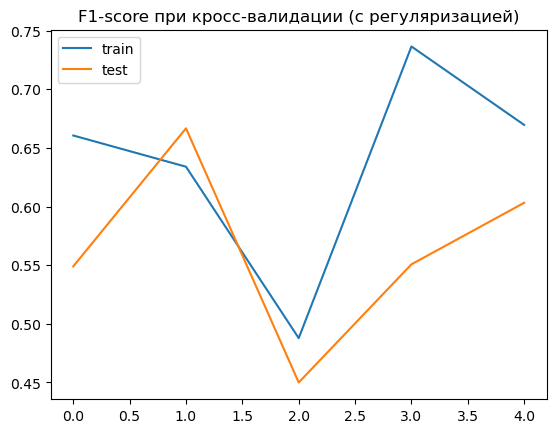

In [27]:
# Кросс-валидация регуляризованной модели
cv_results_reg = cross_validate(model_reg, X, y, cv=5, scoring='f1', return_train_score=True)

plt.plot(cv_results_reg['train_score'], label='train')
plt.plot(cv_results_reg['test_score'], label='test')
plt.legend()
plt.title('F1-score при кросс-валидации (с регуляризацией)')
plt.show()

In [29]:
# Загрузка полного датасета для борьбы с недообучением
df_full = pd.read_csv('C:/users/senpai_sqrt2/Desktop/Uni/3rd course/ML/ML_course/ML4.4 diagnostics/data/diabetes.csv')
target = "Outcome"
y_full = df_full[target]
X_full = df_full.drop(target, axis=1)

# Разделение полных данных
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(
    X_full, y_full, test_size=0.2, random_state=42)

# Обучение модели на всех данных
model_full = DecisionTreeClassifier(random_state=1, max_depth=3).fit(X_train_full, y_train_full)

# Оценка модели
y_train_pred_full = model_full.predict(X_train_full)
y_test_pred_full = model_full.predict(X_test_full)

print("Train f1-score (полные данные) = %.4f" % f1_score(y_train_full, y_train_pred_full))
print("Test f1-score (полные данные) = %.4f" % f1_score(y_test_full, y_test_pred_full))

Train f1-score (полные данные) = 0.6584
Test f1-score (полные данные) = 0.6476
